# OpenDataScience questionnaire EDA

Data visualization is a very interesting subject, very creative and subjective. But there are some common principles that drive the work of every DataScientists, and the most important are:
- Clarity
- Interpretability

We will try to present some common techniques to represent data, more over we will try to show how different types of plots or data manipulation can make a plot more interpretable

# Data preparation

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

df = pd.read_csv("2020_opendatascience_poll_data.csv")

In [2]:
df.head()

,Timestamp,What is your residence country (where are you from?),Your timezone (we need that to schedule post timing better),Education,Work status,Data Science expertise level,Age,Are you satisfied with channel update frequency?,Are you satisfied with channel's material complexity?,What field are you interested in (multiple choices are possible),How did you find out about the channel?,How likely are you going to recommend a channel to your friend or colleague?,What’s the main reason for your score? *,"If you want to reach for the editors and to write something, please use the field below:"
0,2020/01/29 1:30:57 PM GMT+3,Ukraine,GMT+3,Undergrad,Student + part time remote job,Middle,18-24,"Yes, it's about perfect",It's all ok,#CV #DL #imageprocessing #videolearning;#RL #D...,Forward from a friend,5,All stuff is absolutely brilliant! Thank you f...,NaN
1,2020/01/29 1:31:19 PM GMT+3,Russia,GMT+3,Graduate,Employed,Middle,31-42,"Nope, less frequent posting will be all right ...",It's all ok,#RL #DL;#NLP #NLU #conversational #dialoguesys...,"It's been so long time ago, I can't remember (...",4,it's ok,"post some jobs with salary ranges, especially ..."
2,2020/01/29 1:32:48 PM GMT+3,Ukraine,GMT+2,PhD,Unemployed,"Novice (Studying courses, active learning)",25-30,"Yes, it's about perfect",Need more specific and complicated materials,#WhereToStart #EntryLevel #Novice #MOOC #Learn...,Telegram channel search,3,NaN,NaN
3,2020/01/29 1:33:27 PM GMT+3,Italy,GMT+1,"No degree at all, still learning / self-taught",Student,"Novice (Studying courses, active learning)",18-24,"Yes, it's about perfect",It's all ok,#CV #DL #imageprocessing #videolearning;#RL #D...,Forward from a friend,5,Mainly due to material shared,NaN
4,2020/01/29 1:33:49 PM GMT+3,Ukraine,GMT+2,Graduate,Employed,Middle,18-24,"Yes, it's about perfect",It's all ok,#RL #DL;#NLP #NLU #conversational #dialoguesys...,"It's been so long time ago, I can't remember (...",2,It's not super useful actually. Good enough to...,NaN


In [3]:
df.columns

Index(['Timestamp', 'What is your residence country (where are you from?)',
       'Your timezone (we need that to schedule post timing better)',
       'Education', 'Work status', 'Data Science expertise  level', 'Age',
       'Are you satisfied with channel update frequency?',
       'Are you satisfied with channel's material complexity?',
       'What field are you interested in (multiple choices are possible)',
       'How did you find out about the channel?',
       'How likely are you going to recommend a channel to your friend or colleague?',
       'What’s the main reason for your score? *',
       'If you want to reach for the editors and to write something, please use the field below:'],
      dtype='object')

In order to manipulate the dataset easily we will change names of columns. So we will work with shorter names.

In [4]:
df["Country"] = df.iloc[:,1]
df["Timezone"] = df.iloc[:,2]
df["Work"] = df.iloc[:,4]
df["Experience"] = df.iloc[:,5]
df["Sat_update"] = df.iloc[:,7]
df["Sat_material"] = df.iloc[:,8]
df["Interests"] = df.iloc[:,9]
df["How_found"] = df.iloc[:,10]
df["Recommend"] = df.iloc[:,11]
df["Why"] = df.iloc[:,12]
df = df.drop(["Your timezone (we need that to schedule post timing better)",
             "What is your residence country (where are you from?)",
             "Work status",
             "Data Science expertise  level",
             "Are you satisfied with channel update frequency?",
             "Are you satisfied with channel's material complexity?",
             "What field are you interested in (multiple choices are possible)",
             "How did you find out about the channel?",
             "How likely are you going to recommend a channel to your friend or colleague?",
             "What’s the main reason for your score? *"],axis=1, inplace=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 14 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   Timestamp                                                                                 557 non-null    object
 1   Education                                                                                 557 non-null    object
 2   Age                                                                                       557 non-null    object
 3   If you want to reach for the editors and to write something, please use the field below:  96 non-null     object
 4   Country                                                                                   548 non-null    object
 5   Timezone                                                        

In [6]:
df.Education.unique()

array(['Undergrad', 'Graduate', 'PhD',
       'No degree at all, still learning / self-taught',
       "I hold a degree in a field irrelevant to DS but as it comes to DS, I'm all self-taught",
       'Post-Doc'], dtype=object)

Now we are ready to perform our EDA. Let's go.

# 01 Countries

Let's start to see where the audience come from. We start by aggregating rows via the groupby operation provided by pandas.
Once groups are created we call .size() to get how many rows belong to each group. Than we create a DataFrame that will be fed to plotly to create the plot. Plotly works in this way:
- Provide the dataFrame
- Provide columns of the DataFrame that will be plotted

(Actually Plotly can work also with standard arrays, but here we will use always DataFrames)

In [7]:
countries = pd.DataFrame(data= df.groupby("Country").size(), columns=["Count"])
countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, Argentina to Yemen
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   56 non-null     int64
dtypes: int64(1)
memory usage: 896.0+ bytes


You see that a single column 'Count' was created, while the name of the country represent the index of the DataFrame.
To create a column with names of countries we do the following

In [8]:
countries = countries.reset_index()
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  56 non-null     object
 1   Count    56 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


Now we are ready to use APIs of plotly to create fantastic plots.
Let's start with one of the most common charts, the Pie Chart

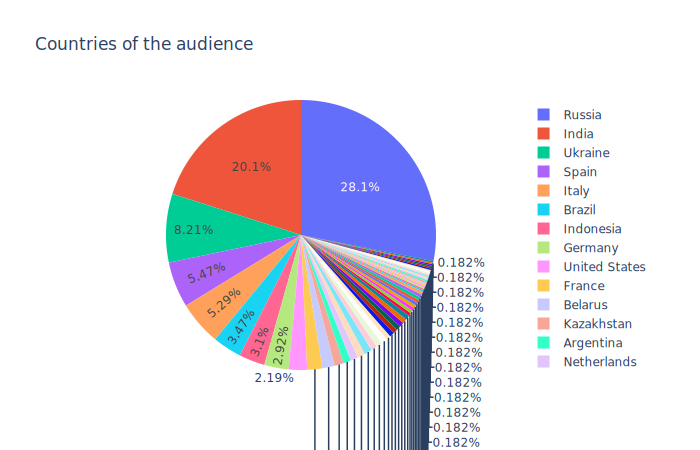

In [9]:
fig = px.pie(countries, values='Count', names='Country', title='Countries of the audience')
fig.show("svg")

It contains all information we were looking for, but there is a problem, isn't it?
Due the great fragmentation of countries, It's difficult to see where your country is (in particular if It has few interviewed).
Let's try to fix this using another plot, the Bar Plot.

Note the 'fig.show("svg")': Plotly by default displays interactive plots. But to correctly display these plots on Github we need to create static plots. If you run this notebook try to remove "svg" and see what happen.

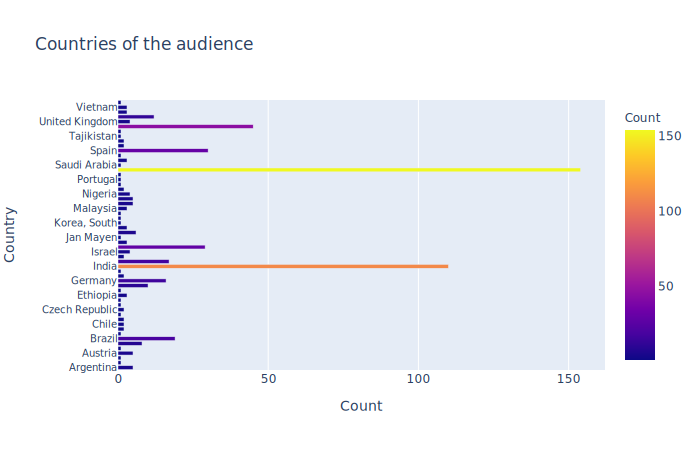

In [10]:
countries.sort_values(by="Country", ascending=True) #sort value by country name
fig = px.bar(countries, x='Count', y='Country', title='Countries of the audience', 
             hover_data=['Count'], color='Count', orientation='h')
fig.update_layout(
    yaxis_tickfont_size=10
)
fig.show("svg")

With this visualization info should be slightly easier to be retrieved. But the plot is very sparse and not very beautiful. We can do better, for example choosing only the K-heighest countries.

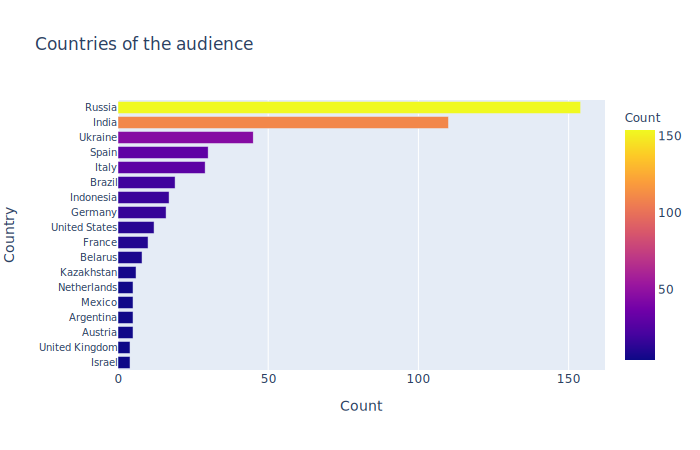

In [11]:
K = 18
countries_to_plot = countries.sort_values(by="Count", ascending=False)[:K] #select K countries with more responses
countries_to_plot_reversed = countries_to_plot[::-1] #to plot Russia as the first element in the top of the plot
fig = px.bar(countries_to_plot_reversed, x='Count', y='Country', title='Countries of the audience', 
             hover_data=['Count'], color='Count', orientation='h')
fig.update_layout(
    yaxis_tickfont_size=10
)
fig.show("svg")

# 02 Work status

Let's then analyze the people's work status.

In [12]:
works = pd.DataFrame(data= df.groupby("Work").size(), columns=["Count"]).reset_index()
works

,Work,Count
0,Employed,303
1,Employed remotely,23
2,Self-employed (co-founder / owner),25
3,Self-employed (freelance),12
4,Student,107
5,Student + part time job,52
6,Student + part time remote job,12
7,Unemployed,23


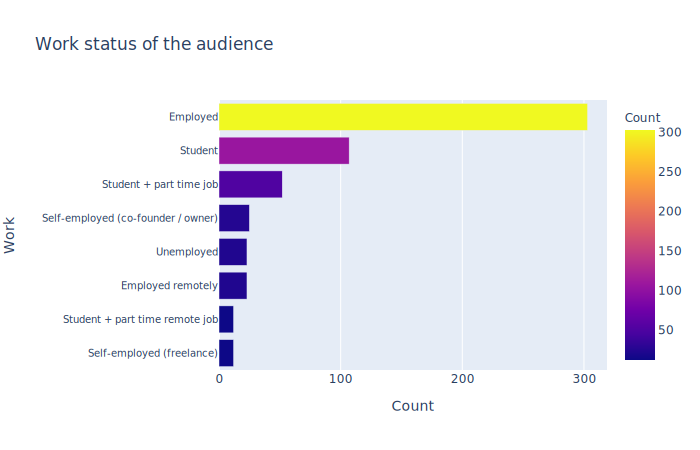

In [13]:
works = works.sort_values(by="Count", ascending=True)
fig = px.bar(works, x='Count', y='Work',  title='Work status of the audience', 
             hover_data=['Count'], color='Count', orientation='h')
fig.update_layout(
    yaxis_tickfont_size=10
)

fig.show("svg")

# 03 Countries and Work Status together

Now that we have have an idea of where people are from and which is their work status, let's try to combine these 2 information.
Our objective is now to represent the relation between each country and the status work of the audience.
To accomplish this we will use the [Violin Plot](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d)
We will plot only the top 5 countries.

In [14]:
K = 5
top_K_countries = countries_to_plot["Country"][:K]
df_top_countries = df.groupby("Country").filter(lambda x : x["Country"].isin(top_K_countries).all())

Before creating the plot we change the original possible responses into a simplified and shorter version, in order to enable the labels to better fit the plot.

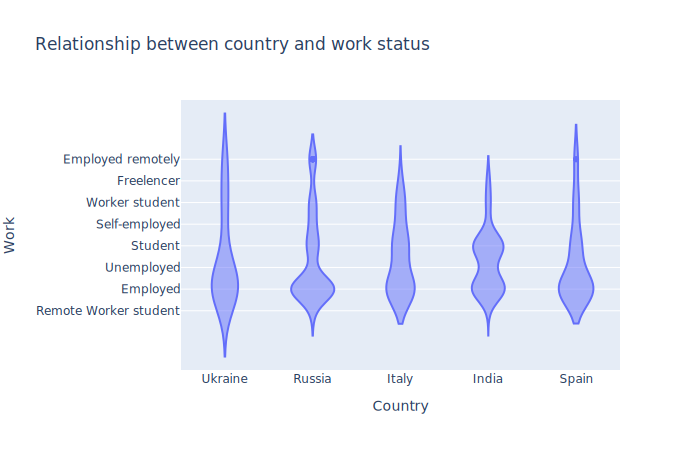

In [15]:
mapper = {
    "Employed remotely": "Employed remotely",
    "Self-employed (freelance)" : "Freelencer",
    "Student + part time job": "Worker student",
    "Self-employed (co-founder / owner)":"Self-employed",
    "Student": "Student",
    "Unemployed": "Unemployed",
    "Employed": "Employed",
    "Student + part time remote job": "Remote Worker student"
}
df_top_countries["Work"] = df_top_countries["Work"].map(mapper)

fig = px.violin(df_top_countries, y="Work", x="Country", title="Relationship between country and work status",
          hover_data=df.columns)
fig.show("svg")

So we can conclude that generally the distribution is quite uniform across different countries, except for India where the number of student is slightly greater then the others top 5 countries.

# 04 Age

We can adopt the Violin Plot also to represent the age distribution of the audience among countries.

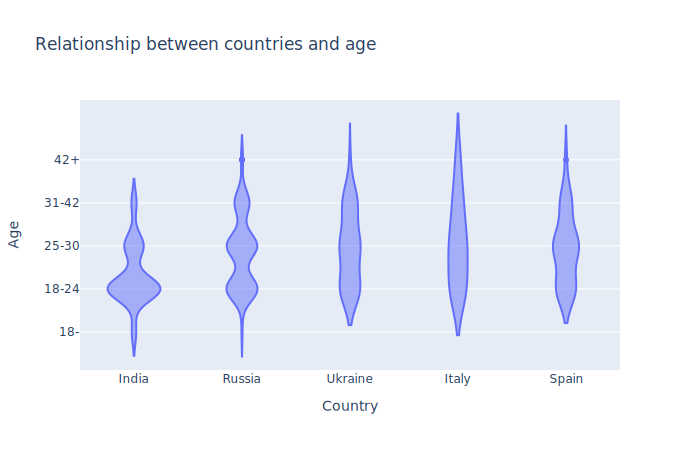

In [16]:
df_top_countries_by_age = df_top_countries.sort_values(by="Age", ascending=True)
fig = px.violin(df_top_countries_by_age, y="Age", x="Country", title="Relationship between countries and age",
                hover_data=df.columns)
fig.show("svg")

# 05 Is the audience satified about the material and update frequency?

One of the main reasons behind the survey is to understand if the audience is satified about the complexity of the material.
To better understand if the audience is satisfied we can (again) use a Violin Plot.

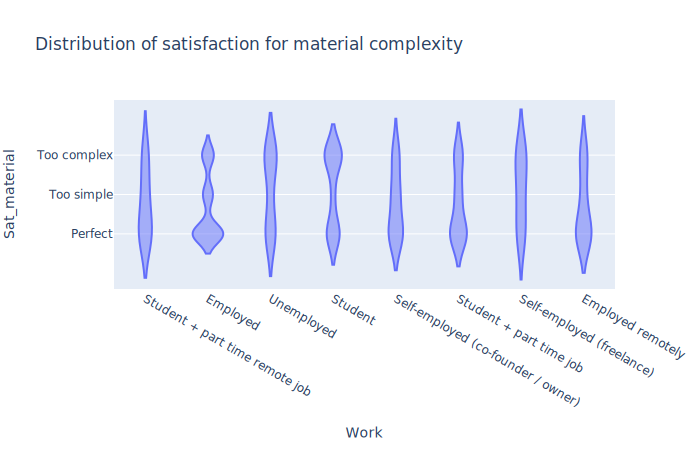

In [17]:
mapper = {
    "Need more beginners' stuff": "Too complex",
    "Need more specific and complicated materials" : "Too simple",
    "It's all ok": "Perfect"
}

df["Sat_material"] = df["Sat_material"].map(mapper)
fig = px.violin(df, y="Sat_material", x="Work",hover_data=df.columns,
                title='Distribution of satisfaction for material complexity')
fig.show("svg")

Let's do the same for the update frequency.

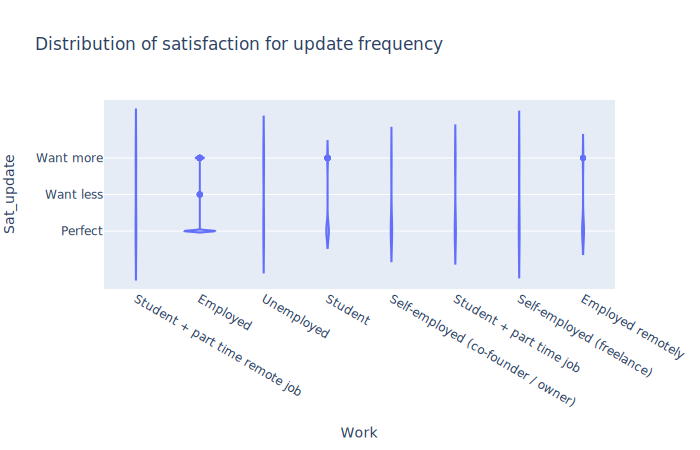

In [18]:
mapper = {
    "Nope, need more information": "Want more",
    "Nope, less frequent posting will be all right by me" : "Want less",
    "Yes, it's about perfect": "Perfect"
}

df["Sat_update"] = df["Sat_update"].map(mapper)
fig = px.violin(df, y="Sat_update", x="Work",hover_data=df.columns, 
                title='Distribution of satisfaction for update frequency')
fig.show("svg")

In this case the plot is meaningless, thus another perspective is required.
Let's try with a Bar Plot.

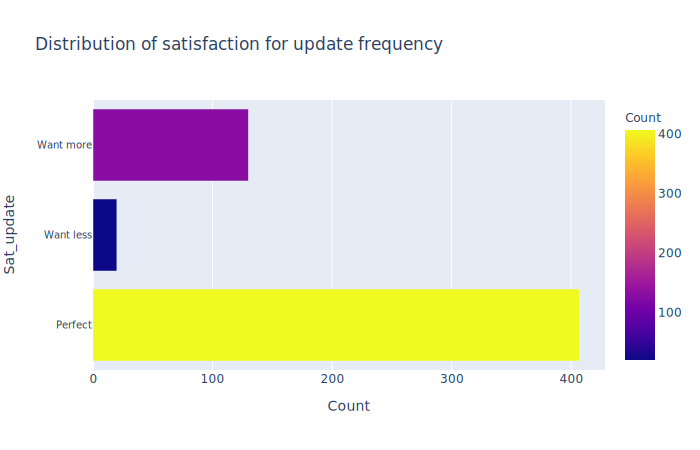

In [19]:
update_freq = pd.DataFrame(df.groupby("Sat_update").size(), columns=["Count"]).reset_index()
fig = px.bar(update_freq, x='Count', y='Sat_update',  title='Distribution of satisfaction for update frequency', 
             hover_data=['Count'], color='Count', orientation='h')
fig.update_layout(
    yaxis_tickfont_size=10
)
fig.show("svg")